In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/open_iit_data/'

/content/drive/My Drive/open_iit_data


In [3]:
!ls

 combine_data.xlsx	 lstm_model.sav		  regression_model.sav	   xgboost_output.csv
 final.ipynb		 LSTM_new2.ipynb	  shifted_whole_data.csv   xgboost.sav
 Final_whole_data.csv	 LSTMPREDICT.csv	  Untitled0.ipynb	   y.csv
 Linear_regression.sav	 pilgrims_final.csv	  Whole_data.csv	   y_original.csv
'LSTM (1).ipynb'	 regression_final.ipynb   xgboost2.sav
 LSTM_MODEL.h5		 regression.ipynb	  xgboost_output2.csv


#Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
df = pd.read_csv('shifted_whole_data.csv')

In [6]:
df.head()

,helper,Date,tirupati rooms,tirupati temple history,ttd,venkateswara yt,venkateswara swamy,tirupati darshan timings,tirumala,train to tirupati,tirupati,tirupati train,kanipakam,tirupati distance,kalahasti,Pilgrims
0,0,20-10-2013,21,22,8,59,16,32,49,72,42,51,35,36,60,363223.0
1,1,27-10-2013,16,30,9,58,15,24,50,81,42,53,40,34,46,425182.0
2,2,03-11-2013,9,0,11,49,12,34,63,89,45,61,38,42,53,406690.0
3,3,10-11-2013,19,0,13,31,19,0,60,72,45,55,32,36,72,378546.0
4,4,17-11-2013,24,0,13,41,16,24,58,81,45,53,31,53,74,378180.0


In [7]:
df.drop(columns = ['helper' , 'venkateswara swamy' , 'ttd'  , 'Date'] , inplace = True)

In [8]:
df.head()

,tirupati rooms,tirupati temple history,venkateswara yt,tirupati darshan timings,tirumala,train to tirupati,tirupati,tirupati train,kanipakam,tirupati distance,kalahasti,Pilgrims
0,21,22,59,32,49,72,42,51,35,36,60,363223.0
1,16,30,58,24,50,81,42,53,40,34,46,425182.0
2,9,0,49,34,63,89,45,61,38,42,53,406690.0
3,19,0,31,0,60,72,45,55,32,36,72,378546.0
4,24,0,41,24,58,81,45,53,31,53,74,378180.0


In [9]:
df.tail()

,tirupati rooms,tirupati temple history,venkateswara yt,tirupati darshan timings,tirumala,train to tirupati,tirupati,tirupati train,kanipakam,tirupati distance,kalahasti,Pilgrims
514,27,27,35,55,64,33,78,64,57,81,51,514367.0
515,34,16,39,40,62,29,73,61,64,73,50,478997.0
516,32,18,39,33,56,27,72,54,69,68,49,474883.0
517,33,31,38,33,65,25,63,55,86,66,41,490777.0
518,42,26,41,65,75,35,65,75,79,85,44,519928.0


In [10]:
df.isnull().sum()

tirupati rooms              0
tirupati temple history     0
venkateswara yt             0
tirupati darshan timings    0
tirumala                    0
train to tirupati           0
tirupati                    0
tirupati train              0
kanipakam                   0
tirupati distance           0
kalahasti                   0
Pilgrims                    0
dtype: int64

In [11]:
x = df.drop(columns = ['Pilgrims'])
y = df['Pilgrims']

In [12]:
x=x.to_numpy()
y=y.to_numpy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=43)

In [14]:
reg = ensemble.GradientBoostingRegressor()

In [ ]:
k_folds = 5  # You can change the number of folds as needed
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
# Define the hyperparameter grid for random search
param_dist = {
    'n_estimators': [ 200, 300, 400, 500 , 600],
    'learning_rate': [0.005 , 0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    "loss": ["squared_error"]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    reg, param_distributions=param_dist, n_iter=500 ,  n_jobs=-1, cv=kf, verbose=2, random_state=42
)

In [ ]:
random_search.fit(X_train, y_train)  # Replace X and y with your data

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingRegressor(), n_iter=500, n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1],
                                        'loss': ['squared_error'],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [200, 300, 400, 500,
                                                         600],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [ ]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Best Hyperparameters:  {'subsample': 0.7, 'n_estimators': 600, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.01}
Best Score:  -0.849403831457473


In [15]:
#params = random_search.best_params_
params = {'subsample': 0.7,
          'n_estimators': 600,
          'min_samples_split': 3,
          'min_samples_leaf': 4,
          'max_depth': 3,
          'loss': 'squared_error',
          'learning_rate': 0.01}

In [16]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=4,
                          min_samples_split=3, n_estimators=600, subsample=0.7)

In [24]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 2005926135.5858


In [26]:
test_score = pd.DataFrame(test_score)

In [27]:
test_score.to_csv('test_score.csv')

In [18]:
params["n_estimators"]

600

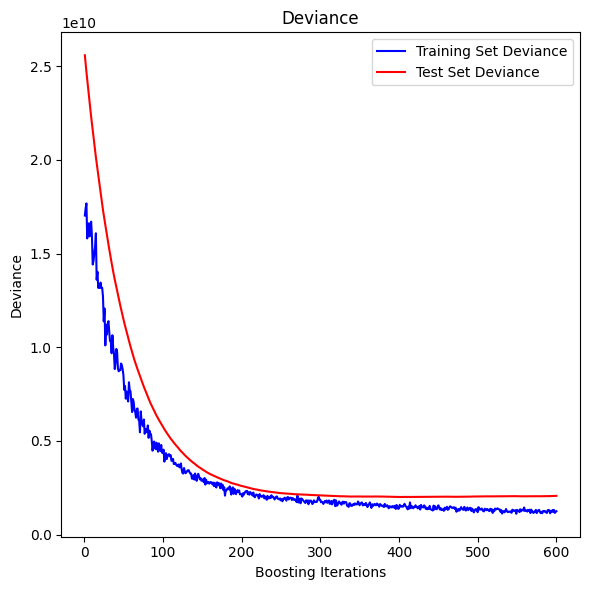

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
print(reg.predict(X_train[0].reshape(1, -1)))

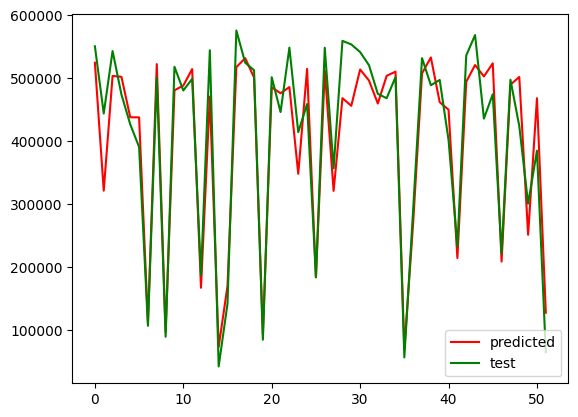

In [ ]:
y_pred=reg.predict(X_test)
plt.plot(y_pred,color='red',label='predicted')
plt.plot(y_test,color='green',label='test')
plt.legend()

In [ ]:
y_train_pred=reg.predict(X_train)

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.12061974241119988

In [ ]:
mean_absolute_percentage_error(y_train_pred, y_train)

0.07316016564156311

In [ ]:
import pickle

In [ ]:
filename = 'xgboost2.sav'

In [ ]:
pickle.dump(reg , open(filename , 'wb'))

In [ ]:
xgboost_output = reg.predict(x)

In [ ]:
xgboost_output = pd.DataFrame(xgboost_output)
xgboost_output.to_csv("xgboost_output2.csv")